# Arbol de Decision de Regresion

El árbol de decisiones es un modelo de predicción utilizado en diversos ámbitos. Dado un conjunto de datos se fabrican diagramas de construcciones lógicas, muy similares a los sistemas de predicción basados en reglas, que sirven para representar y categorizar una serie de condiciones que ocurren de forma sucesiva, para la resolución de un problema.

Para consultar la documentacion: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

## 1.- Importando paquetes y el conjunto de datos

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

data = datasets.load_diabetes()
diabetes_cols = ['Age', 'Sex', 'Body mass index', 'Average blood pressure',
                 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']      # S1-S6 son examenes de sangre hechos a pacientes
diabetes_df = pd.DataFrame(data.data, columns=diabetes_cols)
diabetes_df['target'] = data.target
diabetes_df.head()

,Age,Sex,Body mass index,Average blood pressure,S1,S2,S3,S4,S5,S6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## 2.- Exploracion de los Datos

**El método 'info()'los tipos y números de datos**

In [2]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     442 non-null    float64
 1   Sex                     442 non-null    float64
 2   Body mass index         442 non-null    float64
 3   Average blood pressure  442 non-null    float64
 4   S1                      442 non-null    float64
 5   S2                      442 non-null    float64
 6   S3                      442 non-null    float64
 7   S4                      442 non-null    float64
 8   S5                      442 non-null    float64
 9   S6                      442 non-null    float64
 10  target                  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


**El método 'describe()' obtiene un resumen de estadísticas de las características del conjunto de datos**

In [3]:
diabetes_df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,Age,Sex,Body mass index,Average blood pressure,S1,S2,S3,S4,S5,S6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
10%,-6.726771e-02,-4.464164e-02,-5.794093e-02,-5.731367e-02,-5.798303e-02,-5.796243e-02,-5.444576e-02,-3.949338e-02,-6.100621e-02,-5.906719e-02,60.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
90%,6.314042e-02,5.068012e-02,6.363627e-02,6.318680e-02,6.158728e-02,5.752672e-02,6.336665e-02,7.120998e-02,6.341199e-02,6.105391e-02,265.000000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


### 2.1.- Exploracion Grafica

**Distribución del precio (la cantidad prevista)**

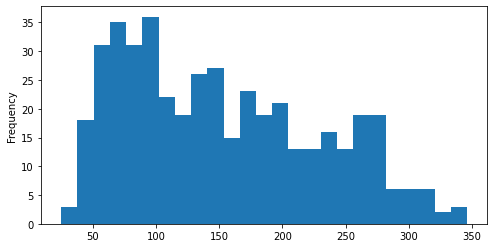

In [4]:
# Histograma
diabetes_df['target'].plot.hist(bins=25,figsize=(8,4))
# Densidad
#diabetes_df['target'].plot.density()

### 2.2.- Correlaciones

In [5]:
#Usamos el metodo corr para obtener la matriz de correlaciones
diabetes_df.corr()

,Age,Sex,Body mass index,Average blood pressure,S1,S2,S3,S4,S5,S6,target
Age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
Sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
Body mass index,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
Average blood pressure,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
S1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
S5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
S6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


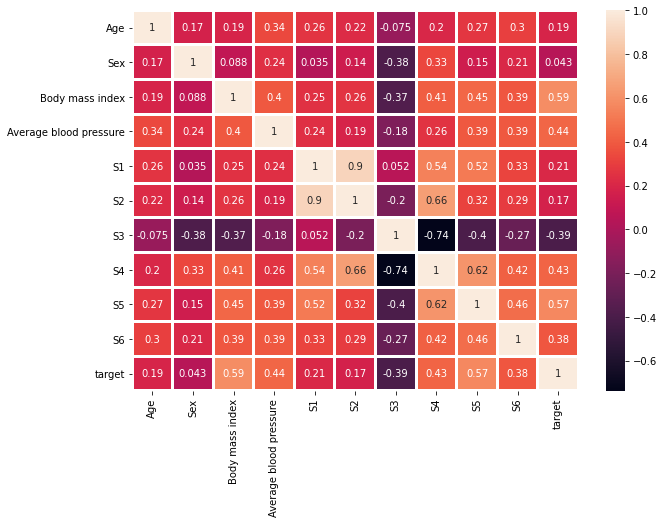

In [6]:
plt.figure(figsize=(10,7))
sns.heatmap(diabetes_df.corr(), annot=True, linewidths=2)

**Las variables S5 y S4 tienen una fuerte correlacion inversa por lo que nos quedaremos con S5 por tener mayor correlacion con la Target.**

**Las variables S5 y S1 tienen una fuerte correlacion inversa por lo que nos quedaremos con S5 por tener mayor correlacion con la Target.**

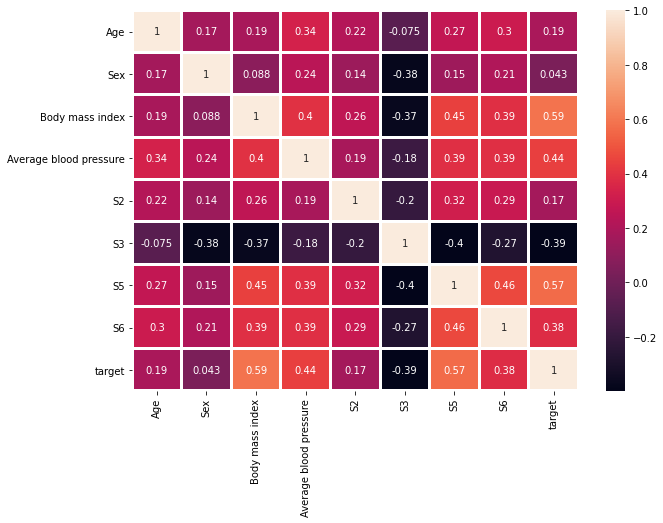

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(diabetes_df[['Age','Sex','Body mass index','Average blood pressure','S2','S3','S5','S6','target']].corr(),
            annot=True, linewidths=2)

## 3.- Modelado

**Empezaremos modelando una regresion lineal multiple para después pasar a la maquina de soporte vectorial**

In [8]:
# Definimos la variable respuesta y la variable predictora
target = 'target'
predictoras = ['Age','Sex','Body mass index','Average blood pressure','S2','S3','S5','S6']

In [9]:
# Obtenemos del dataframe el conjunto de datos
X = diabetes_df[predictoras]
y = diabetes_df[target]
#Visualizamos las variables predictoras
print('\n\nVisualizamos la variable predictora/independiente (X)')
display(X)
print('\n\nVisualizamos la variable respuesta/dependiente (Y)')
y



Visualizamos la variable predictora/independiente (X)


,Age,Sex,Body mass index,Average blood pressure,S2,S3,S5,S6
0,0.038076,0.050680,0.061696,0.021872,-0.034821,-0.043401,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.019163,0.074412,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.034194,-0.032356,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.024991,-0.036038,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.015596,0.008142,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.002566,-0.028674,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.079165,-0.028674,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.013840,-0.024993,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.015283,-0.028674,0.044528,-0.025930




Visualizamos la variable respuesta/dependiente (Y)


0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [10]:
# Generamos el conjunto de train y test gracias a sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [11]:
#Verificamos los tamaños de muestra
print("Tamaño del conjunto de datos Inicial:", diabetes_df.shape)
print("Tamaño del conjunto de características del entrenamiento:",X_train.shape)
print("Tamaño del conjunto de características de prueba:",X_test.shape)
print("Tamaño de la variable objetivo del entrenamiento:",y_train.shape)
print("Tamaño de la variable objetivo de prueba:",y_test.shape)

Tamaño del conjunto de datos Inicial: (442, 11)
Tamaño del conjunto de características del entrenamiento: (353, 8)
Tamaño del conjunto de características de prueba: (89, 8)
Tamaño de la variable objetivo del entrenamiento: (353,)
Tamaño de la variable objetivo de prueba: (89,)


### 3.1.- Regresion Lineal Multiple

In [12]:
# Importamos el Modelo de Regresion Lineal
from sklearn.linear_model import LinearRegression
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de la regresion
lm = LinearRegression() # Creando un objeto de Regresión Lineal 'lm'

In [13]:
# Entrenamiento del modelo
lm.fit(X_train, y_train) # Ajuste el modelo lineal en el objeto 'lm' en sí, es decir, no es necesario establecer esto en otra variable

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Predecimos la data de entrenamiento y la data del test
train_pred=lm.predict(X_train)
test_pred=lm.predict(X_test)

In [15]:
# Cualculando el R2
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test,test_pred), 2))
# Calculando los errores
print("Calculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Cuadratico Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Valor del R cuadrado del train: 0.5
Valor del R cuadrado del test: 0.57
Calculando el Error Absoluto Medio (MAE)
MAE del Train: 43.90906341892038
MAE del Test: 42.881252879346725

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 2943.0414815517347
MAE del Test: 2703.079854542875

Calculando la Raiz del Error Cuadratico Medio (RMSE)
MAE del Train: 54.249806281236935
MAE del Test: 51.991151694715086


### 3.2.-Maquina de Soporte Vectorial

In [16]:
# Importamos el Modelo de Maquina de Soporte Vectorial
from sklearn.svm import SVR
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de la Maquina de Soporte Vectorial
svr_radial = SVR(kernel='rbf', C=16.0, epsilon=0.01)

In [18]:
#Entrenamiento del Modelo
svr_radial.fit(X_train, y_train) 

SVR(C=16.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
# Predecimos la data de entrenamiento y la data del test
train_pred=svr_radial.predict(X_train)
test_pred=svr_radial.predict(X_test)

In [20]:
# Cualculando el R2
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train.values,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test.values,test_pred), 2))
# Calculando los errores
print("\nCalculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Cuadratico Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Valor del R cuadrado del train: 0.55
Valor del R cuadrado del test: 0.59

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 38.984895148432216
MAE del Test: 41.832861435185514

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 2599.6301234941197
MAE del Test: 2582.5593632692303

Calculando la Raiz del Error Cuadratico Medio (RMSE)
MAE del Train: 50.98656806938588
MAE del Test: 50.8188878594291


### 3.3.-Arbol de Decision de Regresion

In [21]:
# Importamos el Modelo del Arbol de Regresión y metodo para graficar
from sklearn.tree import DecisionTreeRegressor, plot_tree
# Importamos las metricas de la regresion
from sklearn import metrics
# Creamos el modelo de Arbol de Decision de Regresion
tree_model = DecisionTreeRegressor(random_state=123)

In [22]:
#Entrenamiento del Modelo
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [23]:
# Predecimos la data de entrenamiento y la data del test
train_pred=tree_model.predict(X_train)
test_pred=tree_model.predict(X_test)

In [24]:
# Cualculando el R2
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train.values,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test.values,test_pred), 2))
# Calculando los errores
print("\nCalculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Cuadratico Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Valor del R cuadrado del train: 1.0
Valor del R cuadrado del test: -0.02

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 0.0
MAE del Test: 59.04494382022472

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 0.0
MAE del Test: 6416.842696629214

Calculando la Raiz del Error Cuadratico Medio (RMSE)
MAE del Train: 0.0
MAE del Test: 80.10519768797286


### 3.4.- Mejor Modelo Con GreadSearch

In [25]:
#Importamos el método GridSearch
from sklearn.model_selection import GridSearchCV
#Definimos los parametos del Gread Search
params = {'max_depth':list(range(2,11)),
          'min_samples_leaf':[x / 100 for x in range(1, 11)]}
#Creamos el Objeto gread search
grid = GridSearchCV(tree_model, param_grid=params, scoring='r2', verbose=1, return_train_score=True)

In [26]:
#Entrenando con GridSearch
grid.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:    2.5s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=123,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [0.01, 0.02, 0.03, 0.04, 0.05,
         

In [27]:
#Obtenemos el mejor estimador
grid.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.09, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [28]:
#Probamos el mejor estimador
tree_model = DecisionTreeRegressor(max_depth= 4, min_samples_leaf = 0.09, random_state=123)
tree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.09, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')

In [29]:
# Predecimos la data de entrenamiento y la data del test
train_pred=tree_model.predict(X_train)
test_pred=tree_model.predict(X_test)

In [30]:
# Cualculando el R2
print("Valor del R cuadrado del train:", round(metrics.r2_score(y_train.values,train_pred), 2))
print("Valor del R cuadrado del test:", round(metrics.r2_score(y_test.values,test_pred), 2))
# Calculando los errores
print("\nCalculando el Error Absoluto Medio (MAE)")
print("MAE del Train:", metrics.mean_absolute_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_absolute_error(y_test,test_pred))
print("\nCalculando el Error Cuadratico Medio (MSE)")
print("MAE del Train:", metrics.mean_squared_error(y_train,train_pred))
print("MAE del Test:", metrics.mean_squared_error(y_test,test_pred))
print("\nCalculando la Raiz del Error Cuadratico Medio (RMSE)")
print("MAE del Train:", np.sqrt( metrics.mean_squared_error(y_train,train_pred)))
print("MAE del Test:", np.sqrt(metrics.mean_squared_error(y_test,test_pred)))

Valor del R cuadrado del train: 0.48
Valor del R cuadrado del test: 0.46

Calculando el Error Absoluto Medio (MAE)
MAE del Train: 44.548216275842904
MAE del Test: 47.25418654412037

Calculando el Error Cuadratico Medio (MSE)
MAE del Train: 3013.8169706793246
MAE del Test: 3393.587813238451

Calculando la Raiz del Error Cuadratico Medio (RMSE)
MAE del Train: 54.898241963466596
MAE del Test: 58.25450895199831


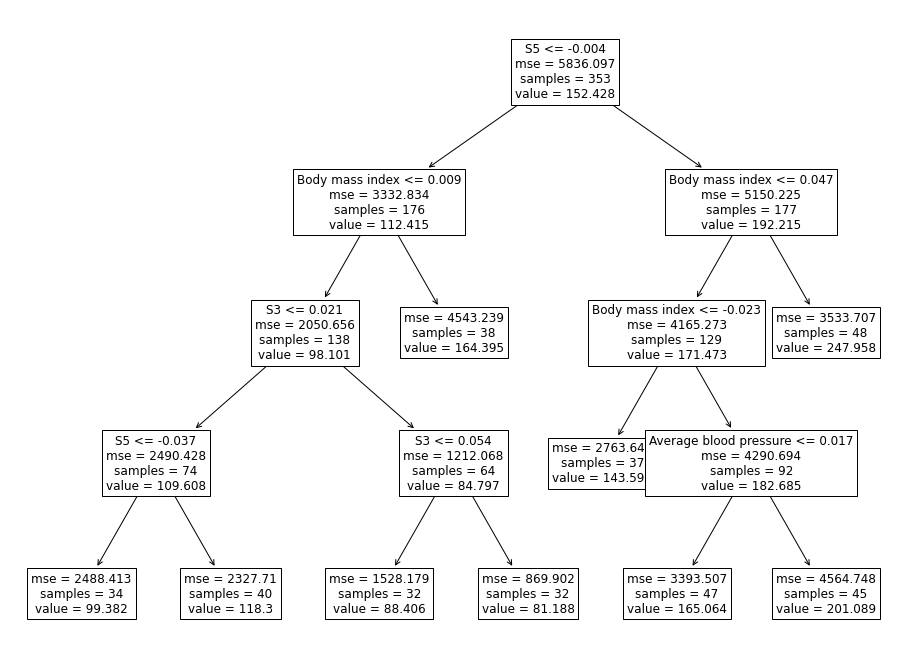

In [31]:
#Graficando el Arbol
fig, ax = plt.subplots(figsize=(16, 12))
plot_tree(tree_model, feature_names = X_train.columns, fontsize=12)
plt.show()